# Primer Data Analysis con el dataset Avocado
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.core.tools.datetimes import to_datetime
from seaborn import set_theme
set_theme()

Tomamos la columna *Date* y la convertimos a una fecha, luego la ordemos y la colocamos como nuestro índice. Tomamos fecha como índice, pues es un valor único y todas las demás columnas dependen del tiempo.

In [8]:
df = pd.read_csv("./archive/avocado.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.set_index('Date', inplace=True)

In [13]:
df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-01-04,51,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
2015-01-04,51,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-04,51,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
2015-01-04,51,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
2015-01-04,51,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


Hay que notar que en realidad la fecha no es un valor único lo cual nos dará problemas más adelante

In [26]:
df["region"].unique()

array(['Southeast', 'Chicago', 'HarrisburgScranton', 'Pittsburgh',
       'Boise', 'WestTexNewMexico', 'LosAngeles', 'LasVegas', 'Atlanta',
       'DallasFtWorth', 'MiamiFtLauderdale', 'Plains', 'StLouis',
       'Syracuse', 'Midsouth', 'Sacramento', 'Boston', 'Charlotte',
       'Spokane', 'Albany', 'Houston', 'SouthCarolina', 'SanFrancisco',
       'TotalUS', 'RaleighGreensboro', 'BuffaloRochester',
       'NorthernNewEngland', 'GrandRapids', 'Denver', 'SanDiego',
       'BaltimoreWashington', 'Roanoke', 'RichmondNorfolk', 'Northeast',
       'SouthCentral', 'GreatLakes', 'Louisville', 'Seattle',
       'CincinnatiDayton', 'NewYork', 'NewOrleansMobile', 'Indianapolis',
       'Jacksonville', 'Columbus', 'Detroit', 'Philadelphia',
       'PhoenixTucson', 'Nashville', 'Portland', 'HartfordSpringfield',
       'Tampa', 'Orlando', 'West', 'California'], dtype=object)

Tomamos una de las ciudades y exploramos un poco el dataset. Si se hace un fork de un dataset y luego cambiamos valores, pandas arrojará una advertencia, pues te previene de que creas que estás cambiando datos que no tienes o que no hagas los cambios que quieres. Para suprimirla le decimos a pandas que tomaremos una copia.

In [45]:
Albany_df = df.copy()[df["region"] == "Albany"]

Veamos como se ven las ventas en el tiempo.

<AxesSubplot:xlabel='Date'>

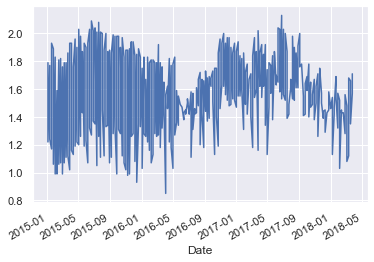

In [46]:
Albany_df["AveragePrice"].plot()

Para suavizar la recta, tomaremos el promedio de los 25 valores anteriores, veamos si con esto vemos un patrón más claro y con menos ruido.

<AxesSubplot:xlabel='Date'>

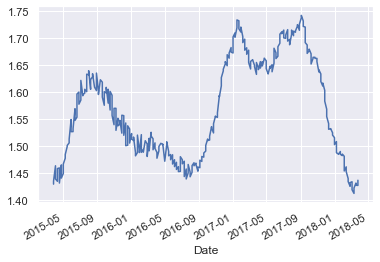

In [47]:
Albany_df["AveragePrice"].rolling(25).mean().dropna().plot()

Al ser un resultado significativo lo almacenamos en una variable.

In [48]:
Albany_df["price25ma"] = Albany_df["AveragePrice"].rolling(25).mean()

Ahora haremos un dataframe con todas las ciudades como columnas y los precios como los valores de los renglones con las fechas como índice.

In [44]:
# graph_df = pd.DataFrame()

# for region in df['region'].unique():
#     region_df = df.copy()[df["region"] == region]
#     region_df.set_index('Date', inplace=True)
#     region_df.sort_index(inplace=True)
#     region_df[f"{region}_price25ma"] = region_df["AveragePrice"].rolling(25).mean()
    
#     if graph_df.empty():
#         graph_df = region_df[[f'{region}_price25ma']]

#     else:
#         graph_df = graph_df.join(region_df[[f'{region}_price25ma']])


Join funciona tomando como índice el data frame al que se aplica y cuando encuentra el mismo valor en el índice le asigna la nueva columna. Así es como lo haríamos normalmente, sin embargo, recuerdan que teníamos fechas repetidas? Pues join no sabrá a cuál de los valores repetidos en el índice incertar los nuevos valores.

**Esto provoca un consumo enorme de memoria RAM, por lo cual encontraremos otra forma de hacerlo.** 

In [52]:
len(df.index.unique())

169

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18249 entries, 2015-01-04 to 2018-03-25
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(2)
memory usage: 2.5+ MB


Podemos notar que solo tenemos 169 valores únicos en la fecha y hay más de 18'000 valores, por lo que elegir la fecha como nuestro índice fue una equivocación, pues a pesar de ser una variable de la que dependen las demás variables, no es de ningún modo única.

En caso de haber tenido las fechas correctas, podríamos hacer plotear todas las ciudades.

In [ ]:
# graph_df.dropna().plot(figsize=(14, 8), lagend=False)